In [1]:
!python --version

Python 3.9.7


In [2]:
import os
import sys
import findspark
findspark.init()

In [3]:
import pandas as pd
import numpy as np

In [4]:
EnergyConsump=pd.read_csv("C:/Users/HP/Desktop/energyconsumptionofcontinents.csv")
EnergyConsump.replace({'..':'0'})
EnergyConsump=EnergyConsump.drop(columns="SNO")
EnergyConsump.to_csv("C:/Users/HP/Desktop/energyconsumptioncontinents.csv")
EnergyConsump.head(5)

Year      World      OECD     BRICS    Europe  North America  \
0  1990  101855.54  52602.49  26621.07  20654.88       24667.23   
1  1991  102483.56  53207.25  26434.99  20631.62       24841.68   
2  1992  102588.23  53788.75  25993.05  20189.68       25341.77   
3  1993  103646.56  54614.48  26283.80  20189.68       25830.23   
4  1994  104449.03  55579.77  25993.05  20085.01       26365.21   

   Latin America      Asia  Pacific   Africa  Middle-East       CIS  
0        5373.06  24574.19  1197.89  4407.77      2581.86  16049.40  
1        5500.99  24783.53  1186.26  4535.70      2744.68  15898.21  
2        5628.92  25690.67  1209.52  4582.22      3081.95  14339.79  
3        5675.44  26876.93  1267.67  4721.78      3349.44  13246.57  
4        5989.45  28098.08  1279.30  4803.19      3640.19  11606.74

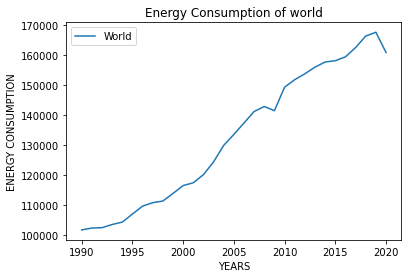

In [5]:
import matplotlib.pyplot as plt
EnergyConsump.plot(x ='Year', y='World', kind = 'line')
plt.title('Energy Consumption of world')
plt.xlabel('YEARS')
plt.ylabel('ENERGY CONSUMPTION')
plt.show()

In [119]:
EnergyConsump.describe()

index          World
count  31.000000      31.000000
mean   15.000000  132792.465484
std     9.092121   22724.116555
min     0.000000  101855.540000
25%     7.500000  111176.985000
50%    15.000000  133582.180000
75%    22.500000  154853.450000
max    30.000000  167553.410000

In [6]:
EnergyConsump.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

C:\Users\HP\AppData\Local\Temp/ipykernel_14216/1409048601.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  EnergyConsump.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
x=EnergyConsump[['Year']].values
y=EnergyConsump['World'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)


In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,train_size=0.75,random_state=1)

In [9]:
from sklearn.linear_model import LinearRegression
classifier=LinearRegression()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [10]:
coeff=classifier.score(x,y)
print('coefficient of determination:',classifier)

coefficient of determination: LinearRegression()


In [11]:
y_pred=classifier.predict(x_test)

In [12]:
predData=pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
predData

Actual      Predicted
0  162459.47  160842.040549
1  103646.56  103051.283063
2  141490.58  141578.454721
3  155958.30  151210.247635
4  153748.60  148802.299406
5  151783.13  146394.351178
6  149294.31  143986.402949
7  142874.55  139170.506492

<AxesSubplot:>

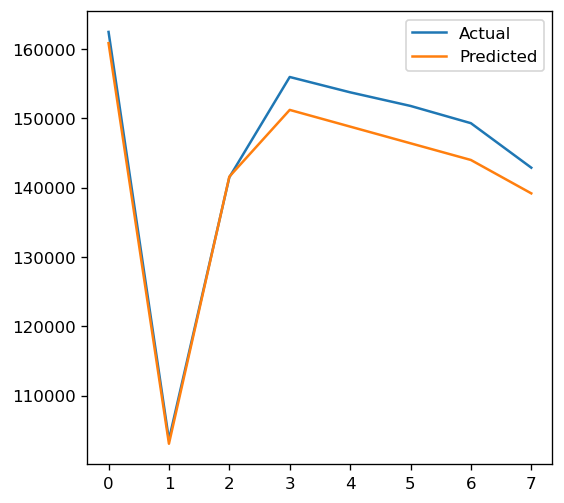

In [52]:
predData.plot.line(figsize=(5,5))

In [82]:
from statsmodels.tsa.stattools import adfuller
x=EnergyConsump['World'].values
result=adfuller(x)
print("ADF",result[0])
print("pvalue",result[1])
print("critical values",result[5])
if result[1]<=0.05:
    print("Data is stationary")
else:
    print("Data is not stationary")

ADF -0.585178903374868
pvalue 0.8742959421665875
critical values 392.3178298804786
Data is not stationary


In [95]:
diff=EnergyConsump['World'].diff()

In [96]:
EnergyConsump_diff=pd.concat([time,diff],axis=1).reset_index().dropna()

In [97]:
EnergyConsump_diff=EnergyConsump_diff.drop(columns=['index'])

<AxesSubplot:>

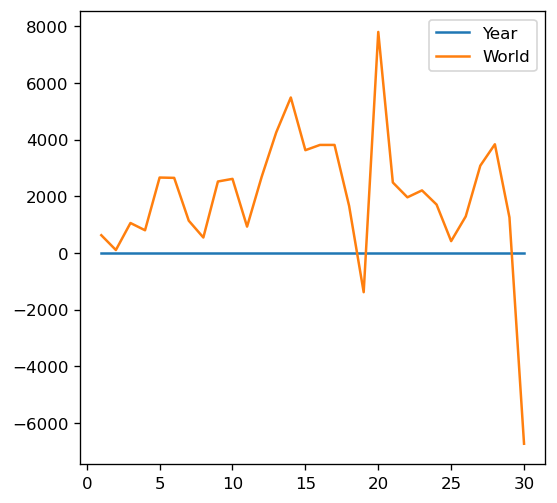

In [124]:
EnergyConsump_diff.plot(figsize=(5,5))